In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn import metrics

%matplotlib inline

In [2]:
cars_flag = False
if cars_flag:
    src = '../cars/car.data'
    import warnings
    warnings.filterwarnings(action='ignore', category=DeprecationWarning)
else:
    src = '../adult/data.txt'
data = pd.read_csv(src, index_col=0)

In [3]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,61,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,Germany,>50K
1,37,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,15024,0,40,United-States,>50K
2,50,Private,1st-4th,2,Married-spouse-absent,Craft-repair,Unmarried,White,Male,0,0,40,United-States,<=50K
3,38,Private,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,50,United-States,>50K
4,56,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,Black,Female,0,0,38,United-States,<=50K


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [5]:
# Set data set specific settings for template

mappings = {}
cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex','native-country', 'class']
if cars_flag:
    scoring = metrics.make_scorer(metrics.matthews_corrcoef)    
    for i in data.columns:
        data[i]=le.fit_transform(data[i])
        mappings[i] = list(le.classes_)
else:
    scoring = 'accuracy'    
    for i in cols:
        data[i]=le.fit_transform(data[i])
        mappings[i] = list(le.classes_)

In [6]:
X = data.loc[:,data.columns != 'class']
y = data.iloc[:,-1]

In [7]:
print(X.shape)
print(y.shape)

(3000, 13)
(3000,)


In [8]:
pca = PCA().fit(X)

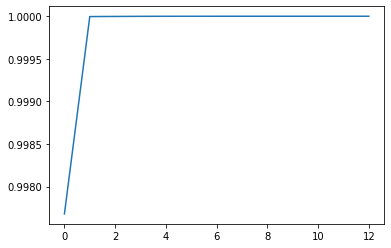

In [9]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [10]:
X_new = PCA(n_components=2).fit_transform(X)

In [11]:
lscore = []
vscore = []
for i in range(1,20):
    em = GaussianMixture(n_components=i)
    em.fit(X_new)
    lscore.append(em.score(X_new))
    y_pred = em.predict(X_new)
    vscore.append(metrics.v_measure_score(y, y_pred))

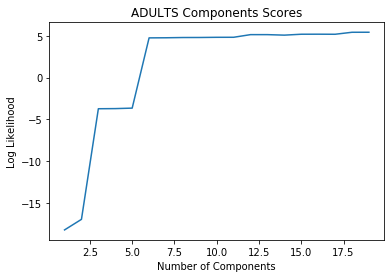

In [12]:
plt.title("ADULTS Components Scores")
plt.xlabel("Number of Components")
plt.ylabel("Log Likelihood")
plt.plot(range(1,20), lscore)

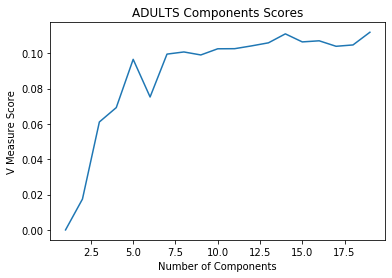

In [13]:
plt.title("ADULTS Components Scores")
plt.xlabel("Number of Components")
plt.ylabel("V Measure Score")
plt.plot(range(1,20), vscore)

In [21]:
score = []
totals= []
for n_iter in (100,200,300):
    for i in range(1,25):
        em = GaussianMixture(n_components=i, max_iter=n_iter)
        em.fit(X)
        y_pred = em.predict(X)
        score.append(metrics.v_measure_score(y, y_pred))
    totals.append(score)
    score = []

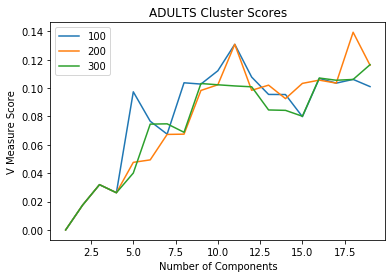

In [22]:
plt.title("ADULTS Cluster Scores")
plt.xlabel("Number of Components")
plt.ylabel("V Measure Score")
plt.plot(range(1,20), totals[0], label="100")
plt.plot(range(1,20), totals[1], label="200")
plt.plot(range(1,20), totals[2], label="300")
plt.legend(loc='best')

In [37]:
lscore = []
ltotals= []
vscore = []
vtotals = []
for n_iter in (100,200,300):
    for i in range(1,25):
        em = GaussianMixture(n_components=i)
        em.fit(X)
        lscore.append(em.score(X))
        y_pred = em.predict(X)
        vscore.append(metrics.v_measure_score(y, y_pred))  
    ltotals.append(lscore)
    lscore = []
    vtotals.append(vscore)
    vtotoal = []

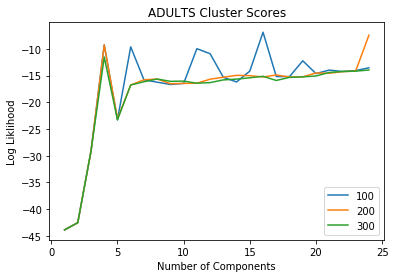

In [38]:
plt.title("ADULTS Cluster Scores")
plt.xlabel("Number of Components")
plt.ylabel("Log Liklihood")
plt.plot(range(1,25), ltotals[0], label="100")
plt.plot(range(1,25), ltotals[1], label="200")
plt.plot(range(1,25), ltotals[2], label="300")
plt.legend(loc='best')

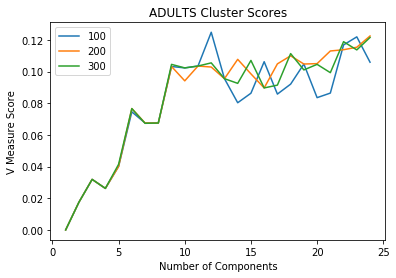

In [39]:
plt.title("ADULTS Cluster Scores")
plt.xlabel("Number of Components")
plt.ylabel("V Measure Score")
plt.plot(range(1,25), totals[0], label="100")
plt.plot(range(1,25), totals[1], label="200")
plt.plot(range(1,25), totals[2], label="300")
plt.legend(loc='best')